## **Install OpenCV library in Python.**

In [ ]:
!pip install -q opencv-python


## ** Import the necessary libraries.**

In [1]:
# Libraries for working with image processing
import numpy as np
import pandas as pd
import cv2
from google.colab.patches import cv2_imshow
# Libraries needed to edit/save/watch video clips
from moviepy import editor
import moviepy
import matplotlib.pyplot as plt

# **Define the driver function for our algorithm.**

In [ ]:
def process_video(test_video, output_video):
    input_video = editor.VideoFileClip(test_video, audio=False)
    processed = input_video.fl_image(frame_processor)
    processed.write_videofile(output_video, audio=False)

process_video('input.mp4', 'output.mp4')


Moviepy - Building video output.mp4.
Moviepy - Writing video output.mp4



Moviepy - Done !
Moviepy - video ready output.mp4


In [ ]:
def process_video(test_video, output_video):
    """
    Read input video stream and produce a video file with detected lane lines.
    Parameters:
        test_video: location of input video file
        output_video: location where output video file is to be saved
    """
    # read the video file using VideoFileClip without audio
    input_video = editor.VideoFileClip(test_video, audio=False)
    # apply the function "frame_processor" to each frame of the video
    # will give more detail about "frame_processor" in further steps
    # "processed" stores the output video
    processed = input_video.fl_image(frame_processor)
    # save the output video stream to an mp4 file
    processed.write_videofile(output_video, audio=False)

### **Define “frame_processor” function where all the processing happens on a frame to detect lane lines.**

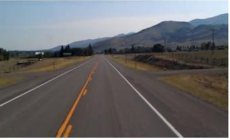

input image


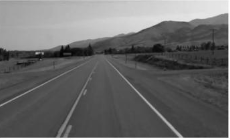

grayscale image


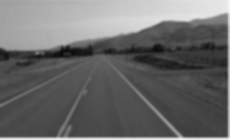

guassian blur


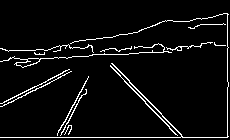

canny edge detection image


In [ ]:
image_path = 'image.jpg'
image = cv2.imread(image_path)

# Convert the image to grayscale
grayscale = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply Gaussian Blur
kernel_size = 5
blur = cv2.GaussianBlur(grayscale, (kernel_size, kernel_size), 0)

# Apply Canny edge detection
low_t = 50
high_t = 150
edges = cv2.Canny(blur, low_t, high_t)

# Display the original, grayscale, blurred, and edge images
cv2_imshow(image)
print("input image")
cv2_imshow(grayscale)
print("grayscale image")
cv2_imshow(blur)
print("guassian blur")
cv2_imshow(edges)
print("canny edge detection image")

# **Region Selection**
Till now we have converted frames from RGB to Grayscale, applied Gaussian Blur to reduce noise and used canny edge detection. Next we will select the region where we want to detect road lanes.



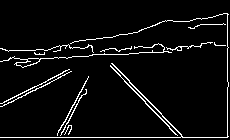

canny edge detection image


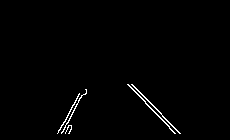

region selection


In [ ]:

# Define the region_selection function
def region_selection(image):
    mask = np.zeros_like(image)
    if len(image.shape) > 2:
        channel_count = image.shape[2]
        ignore_mask_color = (255,) * channel_count
    else:
        ignore_mask_color = 255

    rows, cols = image.shape[:2]
    bottom_left = [cols * 0.1, rows * 0.95]
    top_left = [cols * 0.4, rows * 0.6]
    bottom_right = [cols * 0.9, rows * 0.95]
    top_right = [cols * 0.6, rows * 0.6]
    vertices = np.array([[bottom_left, top_left, top_right, bottom_right]], dtype=np.int32)
    cv2.fillPoly(mask, vertices, ignore_mask_color)
    masked_image = cv2.bitwise_and(image, mask)
    return masked_image

# Load an example image (you can replace this with your image)
image_path = 'image.jpg'
image = cv2.imread(image_path)

# Convert the image to grayscale
grayscale = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply Gaussian Blur
kernel_size = 5
blur = cv2.GaussianBlur(grayscale, (kernel_size, kernel_size), 0)

# Apply Canny edge detection
low_t = 50
high_t = 150
edges = cv2.Canny(blur, low_t, high_t)

# Apply region selection
region = region_selection(edges)

# Display the original, grayscale, blurred, edge, and region-selected images

cv2_imshow(edges)
print("canny edge detection image")
cv2_imshow(region)
print("region selection")



## **Now we will be identifying straight lines in the output image from the above function using Probabilistic Hough Transform**

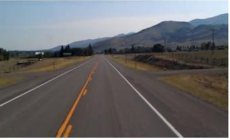

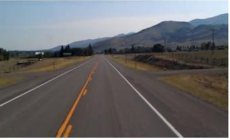

In [ ]:
image_path = 'image.jpg'
image = cv2.imread(image_path)

# Convert the image to grayscale
grayscale = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply Gaussian Blur
kernel_size = 5
blur = cv2.GaussianBlur(grayscale, (kernel_size, kernel_size), 0)

# Apply Canny edge detection
low_t = 50
high_t = 150
edges = cv2.Canny(blur, low_t, high_t)

# Apply region selection
def region_selection(image):
    # Your region selection code here
    pass

region = region_selection(edges)

# Apply Probabilistic Hough Transform to detect straight lines
lines = cv2.HoughLinesP(region, rho=1, theta=np.pi/180, threshold=50, minLineLength=100, maxLineGap=50)

# If lines are detected, draw them on a copy of the original image
line_image = np.copy(image)
if lines is not None:
    for line in lines:
        x1, y1, x2, y2 = line[0]
        cv2.line(line_image, (x1, y1), (x2, y2), (0, 0, 255), 2)

# Display the original image and the image with detected lines
cv2_imshow(image)
cv2_imshow(line_image)

In [ ]:
# You can either upload an image to your Colab environment
from google.colab import files
uploaded = files.upload()

# Load the uploaded image
image_path = list(uploaded.keys())[0]
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)


In [4]:
def hough_transform(image):
    rho = 1
    theta = np.pi/180
    threshold = 20
    minLineLength = 20
    maxLineGap = 500
    return cv2.HoughLinesP(image, rho=rho, theta=theta, threshold=threshold,
                           minLineLength=minLineLength, maxLineGap=maxLineGap)

lines = hough_transform(image)


In [3]:
def hough_transform(image):
    """
    Determine and cut the region of interest in the input image.
    Parameter:
        image: grayscale image which should be an output from the edge detector
    """
    # Distance resolution of the accumulator in pixels.
    rho = 1
    # Angle resolution of the accumulator in radians.
    theta = np.pi/180
    # Only lines that are greater than threshold will be returned.
    threshold = 20
    # Line segments shorter than that are rejected.
    minLineLength = 20
    # Maximum allowed gap between points on the same line to link them
    maxLineGap = 500
    # function returns an array containing dimensions of straight lines
    # appearing in the input image
    return cv2.HoughLinesP(image, rho = rho, theta = theta, threshold = threshold,
                           minLineLength = minLineLength, maxLineGap = maxLineGap)


### **Plotting Lines on video frames**
Now that we have received the coordinates using Hough Transform, we will plot them on our original image(frame) but as we can see that we are getting coordinates of more than 2 lines so we will first find slope of left and right lane and then overlay them over the original image.

We have define 4 functions here to help draw left and right lane on our input frame:

**1.Average_Slope_Intercept:** This function takes in the hough transform lines and calculate their slope and intercept. If the slope of a line is negative then it belongs to left lane else the line belongs to the right lane. Then we calculate the weighted average slope and intercept of left lane and right lanes.

**2.Pixel_Points:** By using slope, intercept and y-values of the line we find the x values for the line and returns the x and y coordinates of lanes as integers.

**3.Lane_Lines:** The function where Average_Slope_Intercept and Pixel Points are called and coordinates of right lane and left lane are calculated.

**4.Draw_Lane_Lines:** This function draws the left lane and right lane of the road on the input frame. Returns the output frame which is then stored in the variable “processed” in our driver function “process_video”.


In [ ]:
def average_slope_intercept(lines):
    """
    Find the slope and intercept of the left and right lanes of each image.
    Parameters:
        lines: output from Hough Transform
    """
    left_lines    = [] #(slope, intercept)
    left_weights  = [] #(length,)
    right_lines   = [] #(slope, intercept)
    right_weights = [] #(length,)

    for line in lines:
        for x1, y1, x2, y2 in line:
            if x1 == x2:
                continue
            # calculating slope of a line
            slope = (y2 - y1) / (x2 - x1)
            # calculating intercept of a line
            intercept = y1 - (slope * x1)
            # calculating length of a line
            length = np.sqrt(((y2 - y1) ** 2) + ((x2 - x1) ** 2))
            # slope of left lane is negative and for right lane slope is positive
            if slope < 0:
                left_lines.append((slope, intercept))
                left_weights.append((length))
            else:
                right_lines.append((slope, intercept))
                right_weights.append((length))
    #
    left_lane  = np.dot(left_weights,  left_lines) / np.sum(left_weights)  if len(left_weights) > 0 else None
    right_lane = np.dot(right_weights, right_lines) / np.sum(right_weights) if len(right_weights) > 0 else None
    return left_lane, right_lane

def pixel_points(y1, y2, line):
    """
    Converts the slope and intercept of each line into pixel points.
        Parameters:
            y1: y-value of the line's starting point.
            y2: y-value of the line's end point.
            line: The slope and intercept of the line.
    """
    if line is None:
        return None
    slope, intercept = line
    x1 = int((y1 - intercept)/slope)
    x2 = int((y2 - intercept)/slope)
    y1 = int(y1)
    y2 = int(y2)
    return ((x1, y1), (x2, y2))

def lane_lines(image, lines):
    """
    Create full lenght lines from pixel points.
        Parameters:
            image: The input test image.
            lines: The output lines from Hough Transform.
    """
    left_lane, right_lane = average_slope_intercept(lines)
    y1 = image.shape[0]
    y2 = y1 * 0.6
    left_line  = pixel_points(y1, y2, left_lane)
    right_line = pixel_points(y1, y2, right_lane)
    return left_line, right_line


def draw_lane_lines(image, lines, color=[255, 0, 0], thickness=12):
    """
    Draw lines onto the input image.
        Parameters:
            image: The input test image (video frame in our case).
            lines: The output lines from Hough Transform.
            color (Default = red): Line color.
            thickness (Default = 12): Line thickness.
    """
    line_image = np.zeros_like(image)
    for line in lines:
        if line is not None:
            cv2.line(line_image, *line,  color, thickness)
    return cv2.addWeighted(image, 1.0, line_image, 1.0, 0.0)